In [42]:
import pandas as pd

In [43]:
df=pd.read_csv('car data.csv')

In [44]:
df.sample(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
14,dzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0
223,verna,2015,8.25,9.40,61381,Diesel,Dealer,Manual,0


In [45]:
df.shape

(301, 9)

In [67]:
print(df['Seller_Type'].unique())
print(df['Owner'].unique())
print(df['Transmission'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']


In [59]:
df.isnull().sum().sum()

0

In [60]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,7.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,3.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,5.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,7.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,9.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,18.000000


In [61]:
df['Number_of_years']=2021-df['Year'] # new feature

In [62]:
df.sample(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years
22,sx4,2011,4.40,8.01,50000,Petrol,Dealer,Automatic,0,10
279,city,2014,6.25,13.60,40126,Petrol,Dealer,Manual,0,7


In [63]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Number_of_years'],
      dtype='object')

In [64]:
final_dataset=['Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Number_of_years']

In [55]:
fdf=df[final_dataset]

In [56]:
fdf.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8


In [57]:
#One-hot encoding 

In [65]:
fdf=pd.get_dummies(fdf,drop_first=True)

In [66]:
fdf.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1


In [68]:
fdf.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Number_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [69]:
import seaborn as sns

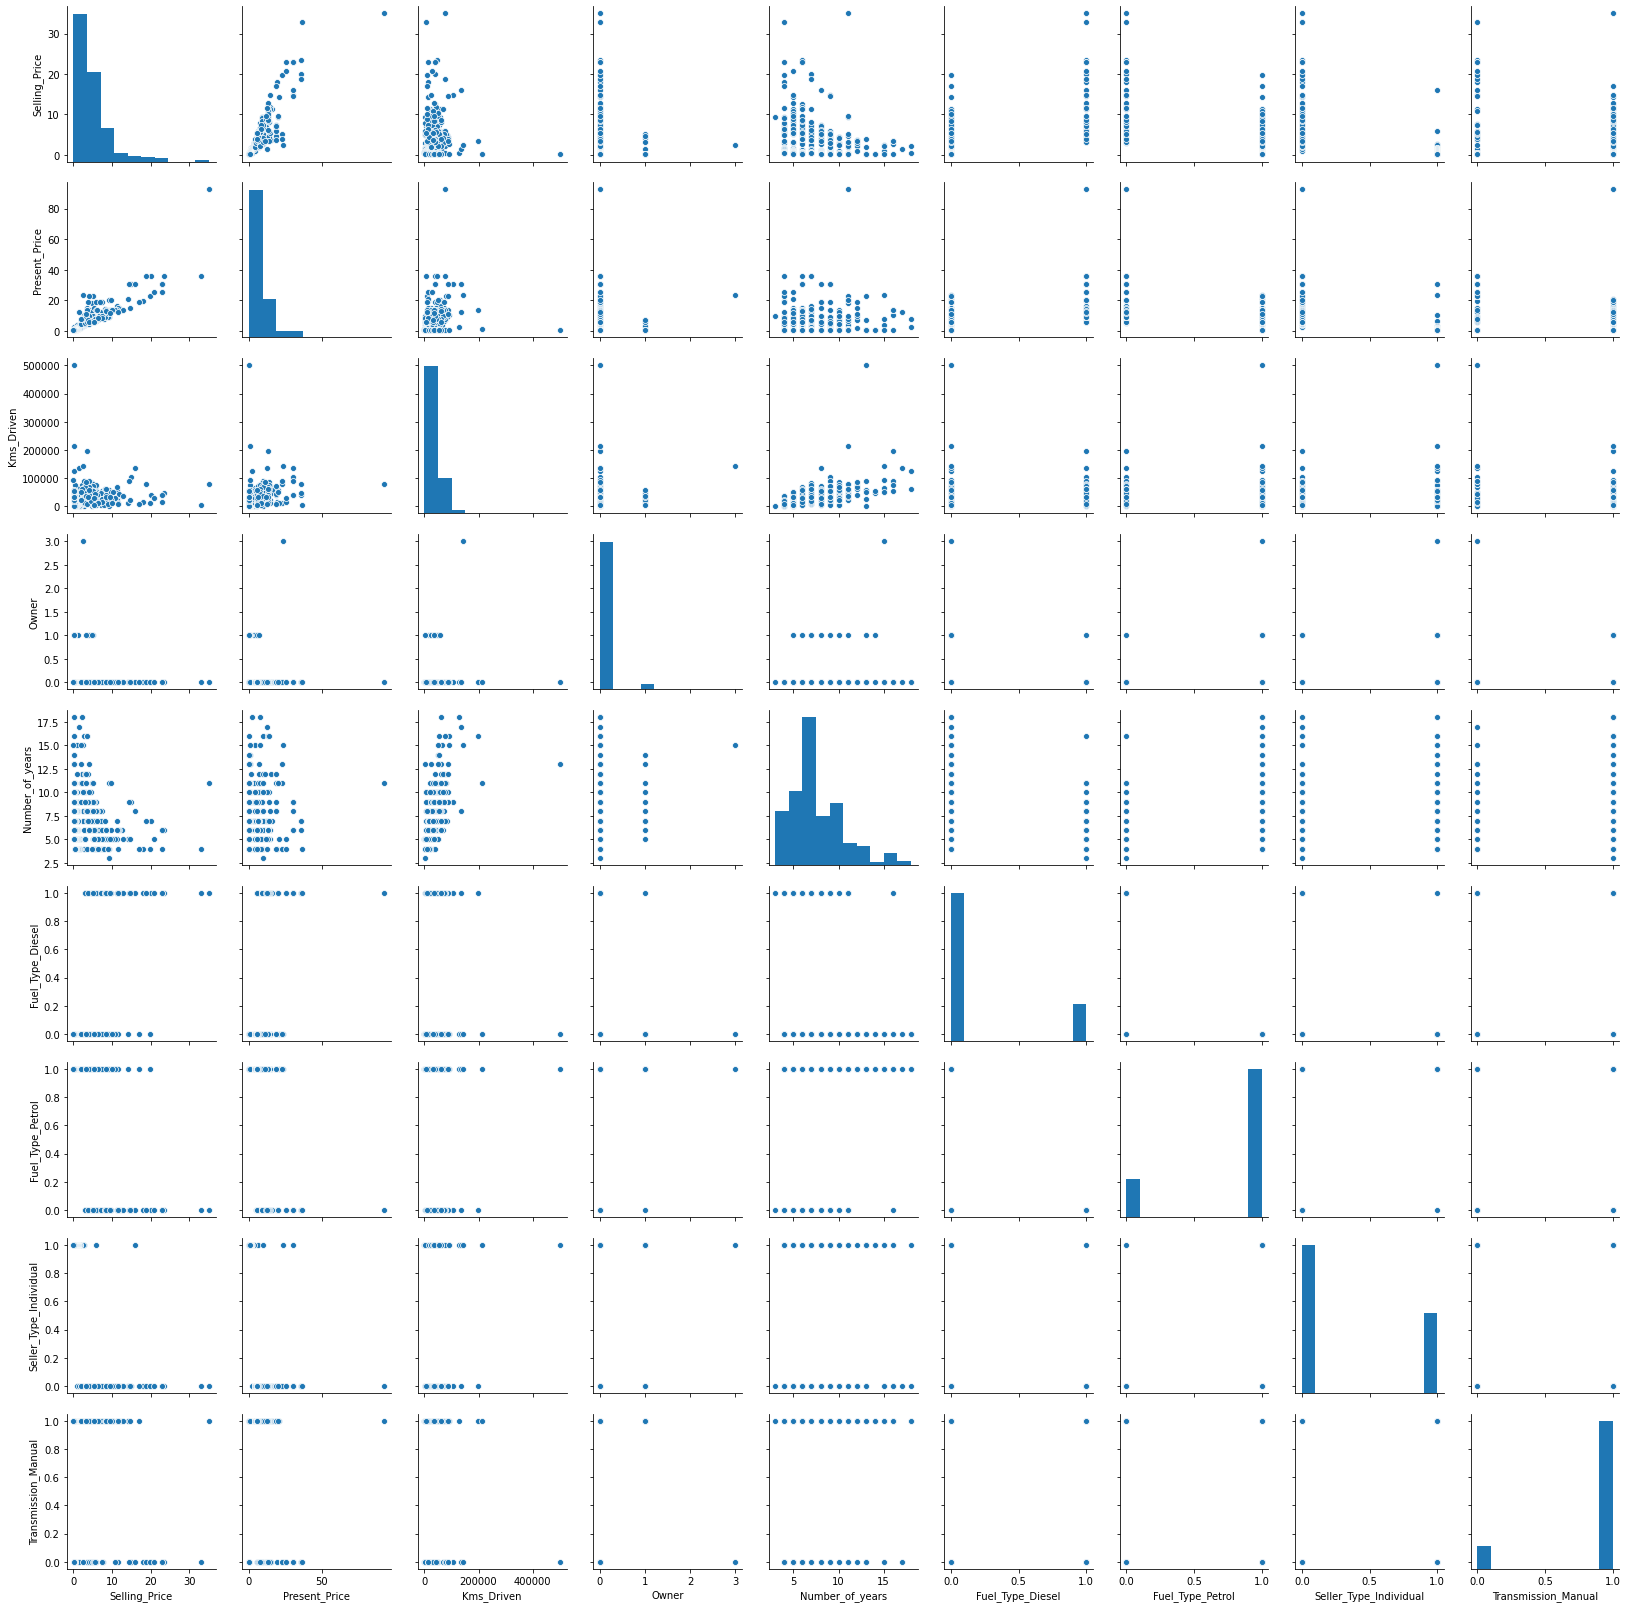

In [70]:
sns.pairplot(fdf)

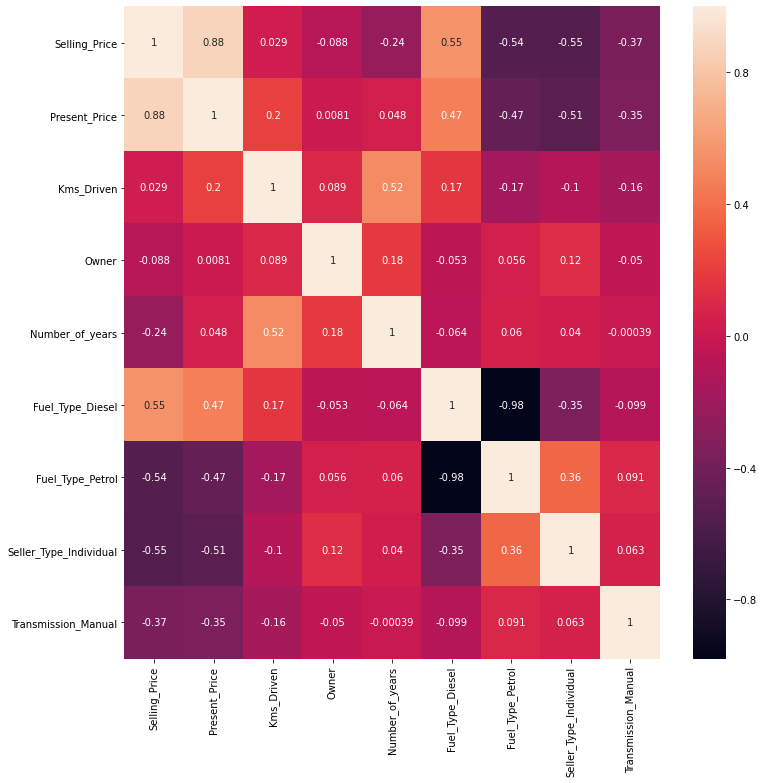

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat=fdf.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(12,12))
g=sns.heatmap(fdf[top_corr_features].corr(), annot=True)
plt.show()

In [76]:
fdf.head(1)

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1


In [77]:
X=fdf.iloc[:,1:]
y=fdf.iloc[:,0]

In [81]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [82]:
model.feature_importances_

array([0.37501256, 0.0395371 , 0.00052235, 0.07576068, 0.22676821,
       0.00852046, 0.13592849, 0.13795015])

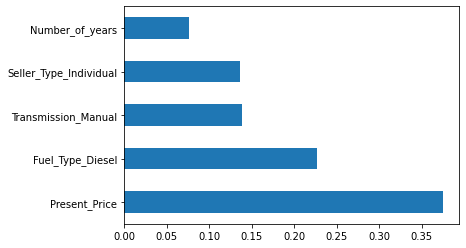

In [84]:
fear_imp=pd.Series(model.feature_importances_, index=X.columns)
fear_imp.nlargest(5).plot(kind='barh')
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [86]:
X_train.shape ,X_test.shape

((240, 8), (61, 8))

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf_random=RandomForestRegressor()

In [90]:
import numpy as np
#### Hyperparameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [91]:
### Randomized search CV
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider in every plit
max_features=['auto','sqrt']
#Maximum number of leves in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [94]:
random_grid={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [95]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [97]:
rf_random=RandomizedSearchCV(estimator=rf_random,param_distributions=random_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10, verbose=2, random_state=42, n_jobs=1)

In [98]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [99]:
predictions=rf_random.predict(X_test)

In [100]:
predictions

array([ 0.26874074,  0.52862655,  4.9017833 , 11.04025838,  4.59332458,
        0.63376439,  5.41042683,  5.28197627, 10.22208691,  5.28976116,
        0.20720804,  0.39522669,  0.32030574,  5.22446471,  6.79459323,
        6.1143408 ,  0.40962134,  0.53478262,  5.7056437 ,  0.24213485,
        0.26393968,  6.76943063,  4.52823168,  4.5365785 ,  2.77736681,
        0.49334457,  1.31993885,  0.4652847 ,  8.08356637,  0.70028736,
        0.70425752,  1.12905682,  6.63814257,  0.38801837,  0.46775274,
        0.4252982 ,  6.82108873,  4.70448067,  0.2769576 ,  2.83731427,
       10.59040125,  0.85483886,  1.88321026,  4.92950508,  9.99182567,
        1.22751459,  0.55895608,  4.22287687,  0.51813021,  1.84176259,
        2.56669944,  9.72278673,  0.35721104,  8.02124725,  7.2371437 ,
        0.39789841, 13.05675333,  4.90567761,  4.17236133,  1.02841096,
        0.52204617])

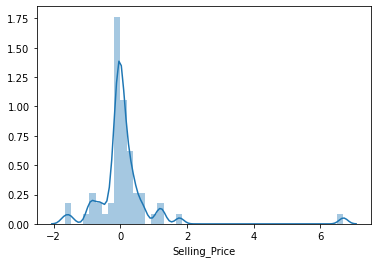

In [101]:
sns.distplot(y_test-predictions)

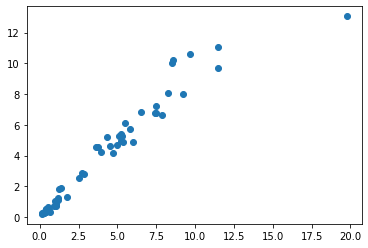

In [103]:
plt.scatter(y_test,predictions)

In [105]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random,file)

In [106]:
jupyter nbconvert --to=python

SyntaxError: invalid syntax (<ipython-input-106-5fcac070c451>, line 1)